# Exploring Data on Financial Literacy

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Reading in Data

We use data from Boisclair, Lusardi and Mitchell (2017)

In [2]:
file = 'survey.dta'

Let's get the labels. For this we use a reader:

In [3]:
reader = pd.io.stata.StataReader(file)
labels = reader.variable_labels()
labels

{'age': 'age of respondent',
 'csa01_1': 'savings in rrsp',
 'csa01_2': 'savings in tfsa',
 'csa01_3': 'savings outside rrsp and tfsa',
 'csa17': 'question 17: formal retirement plan',
 'csa29': 'question 29: interest',
 'csa30': 'question 30: inflation',
 'csa31': 'question 31: diversification',
 'educ': 'education of respondent',
 'gender': 'gender of respondent',
 'lang': 'language',
 'prov': 'province',
 'visibmin': 'visible minority',
 'wc': 'weight'}

Next, we will get the data from Stata and store it into df

In [4]:
df = pd.read_stata(file,convert_categoricals=False)

To look at what the dataset looks like, we can use the head() command: 

In [5]:
df.head()

,csa01_1,csa01_2,csa01_3,csa29,csa30,csa31,csa17,prov,age,gender,visibmin,educ,lang,wc
0,0,0,0,1,98,2,2,9.0,2,2,98,1,2,3188.285645
1,0,0,0,3,2,2,2,9.0,1,2,2,1,2,3188.285645
2,0,0,0,98,98,98,2,9.0,1,2,2,1,2,3188.285645
3,0,1,0,1,98,98,98,9.0,2,2,1,1,2,3188.285645
4,0,0,0,2,98,98,98,9.0,1,2,98,1,2,3188.285645


## Basic Descriptive Stats

We can describe each variables to get sum descriptives

In [6]:
df.describe()

,csa01_1,csa01_2,csa01_3,csa29,csa30,csa31,csa17,prov,age,gender,visibmin,educ,lang,wc
count,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6790.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000
mean,0.610580,0.340779,0.343424,8.625863,16.505364,29.563703,7.176488,6.122386,3.990301,1.478472,10.494636,3.701396,1.239530,1926.463745
std,0.487654,0.474006,0.474886,25.794488,33.533721,43.531965,22.400433,2.773985,1.560054,0.499573,27.500294,1.429884,0.426828,1682.733765
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,417.006958
25%,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,964.501160
50%,1.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,7.000000,4.000000,1.000000,2.000000,4.000000,1.000000,1557.839111
75%,1.000000,1.000000,1.000000,1.000000,3.000000,98.000000,2.000000,9.000000,5.000000,2.000000,2.000000,5.000000,1.000000,2376.714355
max,1.000000,1.000000,1.000000,98.000000,98.000000,98.000000,98.000000,10.000000,6.000000,2.000000,99.000000,6.000000,2.000000,16650.142578


We can select variables using the following indexing

In [7]:
df['csa01_1'].describe()

count    6805.000000
mean        0.610580
std         0.487654
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: csa01_1, dtype: float64

## Indexing

We can access any cell of this array using the following indexing:

In [8]:
df.loc[2,'csa29']

98

Apply that to the describe above since it returned a pandas dataframe:

In [9]:
stats = df.describe()
stats.loc['mean','csa29']

8.625863335782514

Now we can compute stats directly on pandas variables

In [10]:
df['csa29'].mean(),df['csa29'].std()

(8.625863335782514, 25.794487628415464)

## Frequencies and Proportions

Let's now do frequency counts

In [11]:
df['csa29'].value_counts()

1     5492
98     523
2      417
3      373
Name: csa29, dtype: int64

Express them as proportions

In [12]:
df['csa29'].value_counts()/df['csa29'].count()

1     0.807054
98    0.076855
2     0.061278
3     0.054813
Name: csa29, dtype: float64

or

In [13]:
df['csa29'].value_counts(normalize=True)

1     0.807054
98    0.076855
2     0.061278
3     0.054813
Name: csa29, dtype: float64

We can finally sort on index

In [14]:
df['csa29'].value_counts(normalize=True).sort_index()

1     0.807054
2     0.061278
3     0.054813
98    0.076855
Name: csa29, dtype: float64

## Recoding

Let's recode whether the respondent had the right answer to our FL questions

In [15]:
df['interest'] = np.where(df['csa29']==1,1,0)
df['interest'].value_counts(normalize=True).sort_index()

0    0.192946
1    0.807054
Name: interest, dtype: float64

## Grouping

Pandas can do stats by group in a variety of ways. The best one is groupby

In [16]:
tab = df['interest'].groupby([df['prov'],df['gender']]).mean()
tab

prov  gender
1.0   1         0.877023
      2         0.748276
2.0   1         0.814241
      2         0.792350
3.0   1         0.900000
      2         0.809524
4.0   1         0.844444
      2         0.734317
5.0   1         0.815126
      2         0.718750
6.0   1         0.892086
      2         0.713235
7.0   1         0.871032
      2         0.775549
8.0   1         0.842857
      2         0.765957
9.0   1         0.841155
      2         0.719436
10.0  1         0.866667
      2         0.764151
Name: interest, dtype: float64

In [17]:
tab = tab.unstack()

In [18]:
tab.columns = ['male','female']
provinces = ['Newfoundland','Nova Scotia','PEI','New Brunswick','Quebec','Ontario','Manitoba','Saskatchewan','Alberta','British Columbia']
tab.index = provinces

In [19]:
tab.round(3)

,male,female
Newfoundland,0.877,0.748
Nova Scotia,0.814,0.792
PEI,0.900,0.810
New Brunswick,0.844,0.734
Quebec,0.815,0.719
Ontario,0.892,0.713
Manitoba,0.871,0.776
Saskatchewan,0.843,0.766
Alberta,0.841,0.719
British Columbia,0.867,0.764


## Exporting to Excel or Latex

In excel, very simple

In [20]:
tab.round(3).to_excel('interest_by_prov_gender.xlsx')

For latex, use a writer

In [21]:
with open('interest_by_prov_gender.tex','w') as tf:
    tf.write(tab.round(3).to_latex())
    

You can now use both files

## Plotting Results

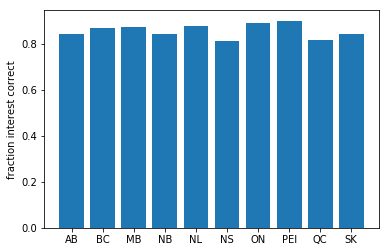

In [22]:
short = ['NL','NS','PEI','NB','QC','ON','MB','SK','AB','BC']
tab.index = short
plt.figure()
plt.bar(tab.index,tab['male'].round(3))
plt.ylabel('fraction interest correct')
plt.savefig('interest_correct.png')
plt.show()